#### Imports

In [8]:
import sys
import os

sys.path.append(os.path.abspath('..'))
from importlib import reload

import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold, RepeatedStratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from config import FEATURES_USED_BY_CLASSIFIER
import numpy as np
import matplotlib.pyplot as plt
import math

## Stopwords_Removed=True, Link_Distance=1&2

In [9]:
df = pd.read_csv('output_neu.csv')
df = df[df['stopwords_removed'] == True]
df = df[df['author'] != 'ALL']
df = df[df['fixed_token_count'] == df['fixed_token_count'].max()]
#df = df[df["link_distance"] == 1 ]
# df = df[df['language'] == 'de']

# Filter für Features, die in Klassifizierung mit einbezogen werden
features = FEATURES_USED_BY_CLASSIFIER


X = df[features]
y = df['author']

# print(df)

Classifier: DummyClassifier
Testdaten-Anteil: 0.25
Unterschiedliche Aufteilungen der Daten: 400
Genauigkeit: 
    Durchschnitt: 0.2451470588235294
    Minimum: 0.0
    Maximum: 0.5882352941176471
    Standardabweichung: 0.1089338669571691
Insgesamt 68 Einträge im Dataframe.


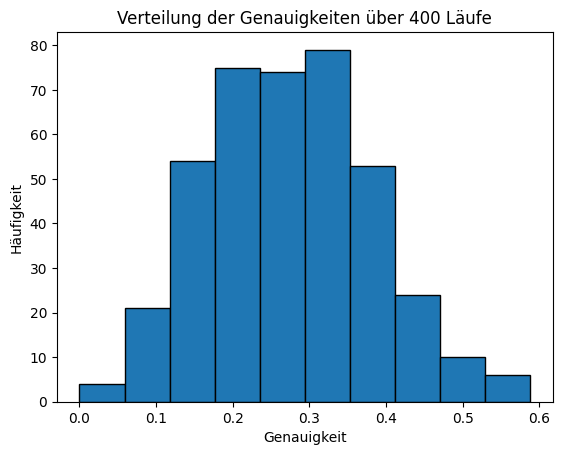

Die zwei wichtigsten Metriken: [('betweenness_min', np.float64(-0.008823529411764711)), ('betweenness_average', np.float64(-0.00588235294117648))]



Classifier: DecisionTreeClassifier
Testdaten-Anteil: 0.25
Unterschiedliche Aufteilungen der Daten: 400
Genauigkeit: 
    Durchschnitt: 0.5273529411764706
    Minimum: 0.17647058823529413
    Maximum: 0.8235294117647058
    Standardabweichung: 0.10764504980446081
Insgesamt 68 Einträge im Dataframe.


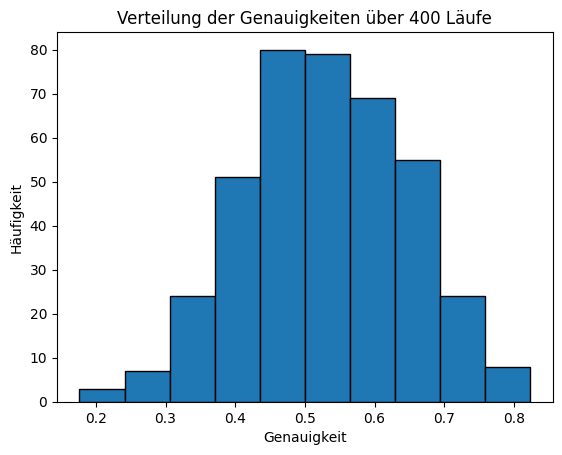

Die zwei wichtigsten Metriken: [('edge_count', np.float64(0.1661764705882353)), ('betweenness_standard_deviation', np.float64(0.5588235294117647))]



Classifier: KNeighborsClassifier
Testdaten-Anteil: 0.25
Unterschiedliche Aufteilungen der Daten: 400
Genauigkeit: 
    Durchschnitt: 0.494264705882353
    Minimum: 0.11764705882352941
    Maximum: 0.7647058823529411
    Standardabweichung: 0.09684457190398664
Insgesamt 68 Einträge im Dataframe.


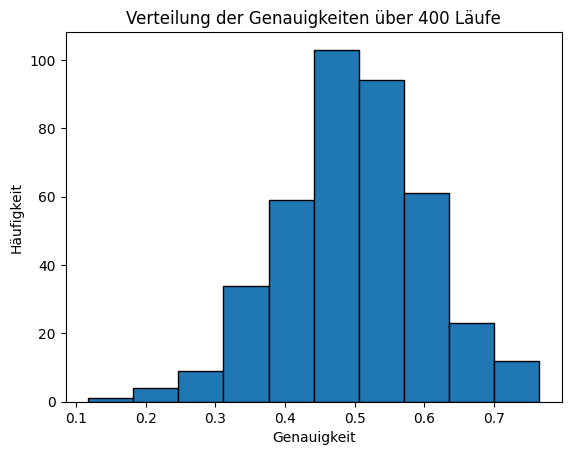

Die zwei wichtigsten Metriken: [('node_count', np.float64(0.1823529411764706)), ('edge_count', np.float64(0.39411764705882346))]



Classifier: GaussianNB
Testdaten-Anteil: 0.25
Unterschiedliche Aufteilungen der Daten: 400
Genauigkeit: 
    Durchschnitt: 0.36544117647058827
    Minimum: 0.058823529411764705
    Maximum: 0.6470588235294118
    Standardabweichung: 0.09855958712643266
Insgesamt 68 Einträge im Dataframe.


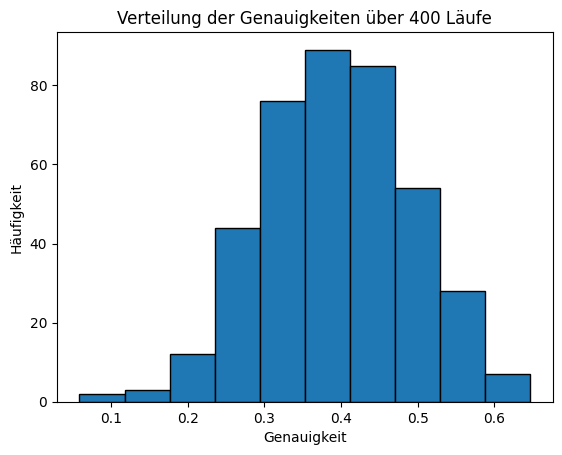

Die zwei wichtigsten Metriken: [('average_distance', np.float64(0.029411764705882366)), ('node_count', np.float64(0.1))]





In [10]:

# Je Split teilen wir die Daten auf
split_count = 4
n_repeats = 100

# Fold festlegen für Kreuzvalidierung
cv = RepeatedStratifiedKFold(n_splits=split_count, n_repeats=n_repeats, random_state=42)

classifier_list = [
    DummyClassifier(strategy='uniform'),
    DecisionTreeClassifier(), # Entscheidungsbaum
    KNeighborsClassifier(n_neighbors=5), # KNN-Algorithmus
    GaussianNB() # Naive-Bayes-Algorithmus
]

for classifier in classifier_list:

    # Bilden der Genauigkeitswerte
    accuracy_scores = cross_val_score(classifier, X, y, cv=cv)

    # Statistiken dazu ausgeben
    print(str.format("Classifier: {0}", classifier.__class__.__name__))
    print(f'Testdaten-Anteil: {1 / split_count}')
    print(f'Unterschiedliche Aufteilungen der Daten: {len(accuracy_scores)}')
    print(f'Genauigkeit: ')
    print(f'    Durchschnitt: {np.mean(accuracy_scores)}')
    print(f'    Minimum: {min(accuracy_scores)}')
    print(f'    Maximum: {max(accuracy_scores)}')
    print(f'    Standardabweichung: {np.std(accuracy_scores)}')
    print(f'Insgesamt {len(df)} Einträge im Dataframe.')

    # Histogramm zu Genauigkeiten plotten
    plt.hist(accuracy_scores, bins=10, edgecolor='black')
    plt.xlabel('Genauigkeit')
    plt.ylabel('Häufigkeit')
    plt.title(f'Verteilung der Genauigkeiten über {len(accuracy_scores)} Läufe')
    plt.show()

    # Klassifikator auf alle verfügbaren Daten trainieren, damit Permutationswichtigkeit bestimmt werden kann.
    classifier.fit(X, y)

    # Bestimmung der Permutationswichtigkeit
    permutation_importance_list = permutation_importance(classifier, X, y, n_repeats=10)
    most_important_features = sorted(list(zip(features, permutation_importance_list.importances_mean)), key = lambda x: x[1])[-2:]
    print(f"Die zwei wichtigsten Metriken: {most_important_features}")
    print(f"\n\n")


## Stopwords_Removed=True, Link_Distance=1

#### Daten einlesen

In [11]:
df = pd.read_csv('output_neu.csv')
df = df[df['stopwords_removed'] == True]
df = df[df['author'] != 'ALL']
df = df[df['fixed_token_count'] == df['fixed_token_count'].max()]
df = df[df["link_distance"] == 1 ]
# df = df[df['language'] == 'de']

# Filter für Features, die in Klassifizierung mit einbezogen werden
features = FEATURES_USED_BY_CLASSIFIER


X = df[features]
y = df['author']

# print(df)

#### Klassifikatoren erstellen, trainieren und Genauigkeit auswerten

Classifier: DummyClassifier
Testdaten-Anteil: 0.25
Unterschiedliche Aufteilungen der Daten: 400
Genauigkeit: 
    Durchschnitt: 0.2340972222222222
    Minimum: 0.0
    Maximum: 0.6666666666666666
    Standardabweichung: 0.13915874824999747
Insgesamt 34 Einträge im Dataframe.


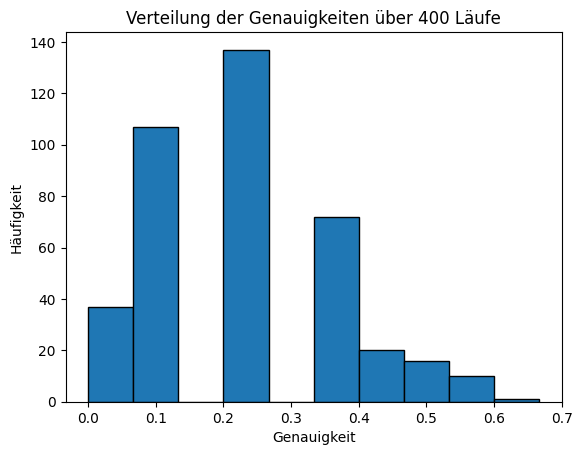

Die zwei wichtigsten Metriken: [('betweenness_max', np.float64(0.13529411764705887)), ('node_count', np.float64(0.15294117647058827))]



Classifier: DecisionTreeClassifier
Testdaten-Anteil: 0.25
Unterschiedliche Aufteilungen der Daten: 400
Genauigkeit: 
    Durchschnitt: 0.546875
    Minimum: 0.0
    Maximum: 0.8888888888888888
    Standardabweichung: 0.15840603533111036
Insgesamt 34 Einträge im Dataframe.


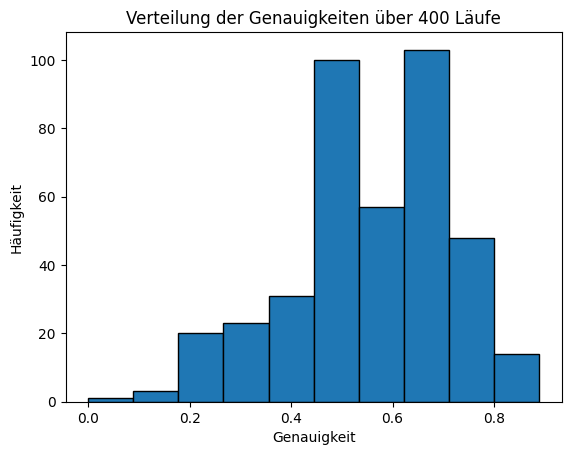

Die zwei wichtigsten Metriken: [('betweenness_standard_deviation', np.float64(0.23823529411764705)), ('edge_count', np.float64(0.5382352941176469))]



Classifier: KNeighborsClassifier
Testdaten-Anteil: 0.25
Unterschiedliche Aufteilungen der Daten: 400
Genauigkeit: 
    Durchschnitt: 0.5129513888888888
    Minimum: 0.125
    Maximum: 0.8888888888888888
    Standardabweichung: 0.13106280282791155
Insgesamt 34 Einträge im Dataframe.


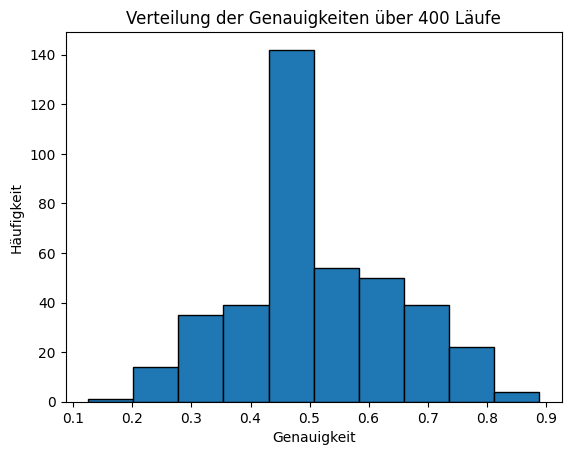

Die zwei wichtigsten Metriken: [('node_count', np.float64(0.15588235294117653)), ('edge_count', np.float64(0.3941176470588236))]



Classifier: GaussianNB
Testdaten-Anteil: 0.25
Unterschiedliche Aufteilungen der Daten: 400
Genauigkeit: 
    Durchschnitt: 0.4862847222222222
    Minimum: 0.0
    Maximum: 0.875
    Standardabweichung: 0.15115766219634247
Insgesamt 34 Einträge im Dataframe.


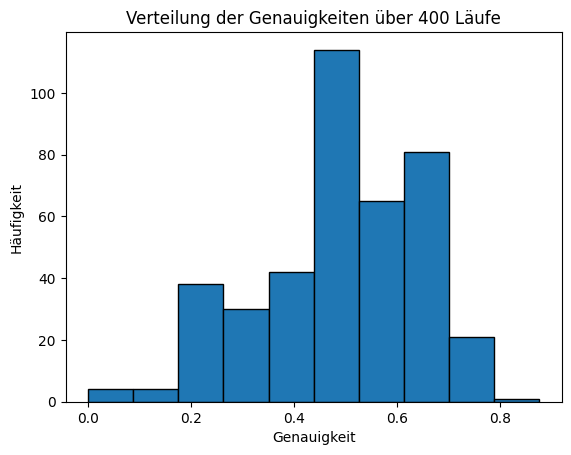

Die zwei wichtigsten Metriken: [('powerlaw_alpha_value', np.float64(0.05000000000000001)), ('edge_count', np.float64(0.07647058823529414))]





In [12]:

# Je Split teilen wir die Daten auf
split_count = 4
n_repeats = 100

# Fold festlegen für Kreuzvalidierung
cv = RepeatedStratifiedKFold(n_splits=split_count, n_repeats=n_repeats, random_state=42)

classifier_list = [
    DummyClassifier(strategy='uniform'),
    DecisionTreeClassifier(), # Entscheidungsbaum
    KNeighborsClassifier(n_neighbors=5), # KNN-Algorithmus
    GaussianNB() # Naive-Bayes-Algorithmus
]

for classifier in classifier_list:

    # Bilden der Genauigkeitswerte
    accuracy_scores = cross_val_score(classifier, X, y, cv=cv)

    # Statistiken dazu ausgeben
    print(str.format("Classifier: {0}", classifier.__class__.__name__))
    print(f'Testdaten-Anteil: {1 / split_count}')
    print(f'Unterschiedliche Aufteilungen der Daten: {len(accuracy_scores)}')
    print(f'Genauigkeit: ')
    print(f'    Durchschnitt: {np.mean(accuracy_scores)}')
    print(f'    Minimum: {min(accuracy_scores)}')
    print(f'    Maximum: {max(accuracy_scores)}')
    print(f'    Standardabweichung: {np.std(accuracy_scores)}')
    print(f'Insgesamt {len(df)} Einträge im Dataframe.')

    # Histogramm zu Genauigkeiten plotten
    plt.hist(accuracy_scores, bins=10, edgecolor='black')
    plt.xlabel('Genauigkeit')
    plt.ylabel('Häufigkeit')
    plt.title(f'Verteilung der Genauigkeiten über {len(accuracy_scores)} Läufe')
    plt.show()

    # Klassifikator auf alle verfügbaren Daten trainieren, damit Permutationswichtigkeit bestimmt werden kann.
    classifier.fit(X, y)

    # Bestimmung der Permutationswichtigkeit
    permutation_importance_list = permutation_importance(classifier, X, y, n_repeats=10)
    most_important_features = sorted(list(zip(features, permutation_importance_list.importances_mean)), key = lambda x: x[1])[-2:]
    print(f"Die zwei wichtigsten Metriken: {most_important_features}")
    print(f"\n\n")


## Stopwords_Removed=True, Link_Distance=2

In [13]:
df = pd.read_csv('output_neu.csv')
df = df[df['stopwords_removed'] == True]
df = df[df['author'] != 'ALL']
df = df[df['fixed_token_count'] == df['fixed_token_count'].max()]
df = df[df["link_distance"] == 2 ]
# df = df[df['language'] == 'de']

# Filter für Features, die in Klassifizierung mit einbezogen werden
features = FEATURES_USED_BY_CLASSIFIER


X = df[features]
y = df['author']

# print(df)

Classifier: DummyClassifier
Testdaten-Anteil: 0.25
Unterschiedliche Aufteilungen der Daten: 400
Genauigkeit: 
    Durchschnitt: 0.254375
    Minimum: 0.0
    Maximum: 0.6666666666666666
    Standardabweichung: 0.1478144371561524
Insgesamt 34 Einträge im Dataframe.


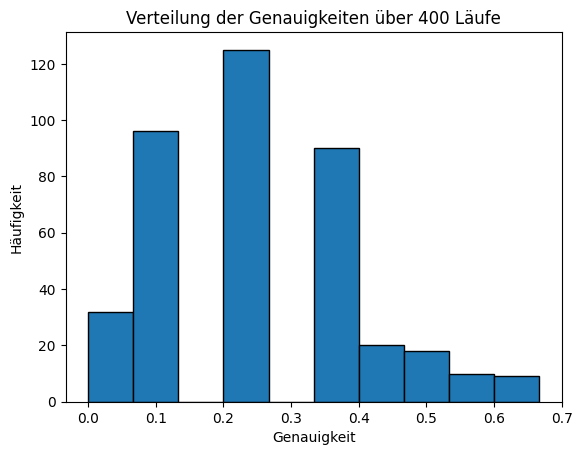

Die zwei wichtigsten Metriken: [('betweenness_max', np.float64(-0.07941176470588235)), ('median_degree', np.float64(-0.044117647058823525))]



Classifier: DecisionTreeClassifier
Testdaten-Anteil: 0.25
Unterschiedliche Aufteilungen der Daten: 400
Genauigkeit: 
    Durchschnitt: 0.48680555555555555
    Minimum: 0.0
    Maximum: 0.8888888888888888
    Standardabweichung: 0.16781864614466166
Insgesamt 34 Einträge im Dataframe.


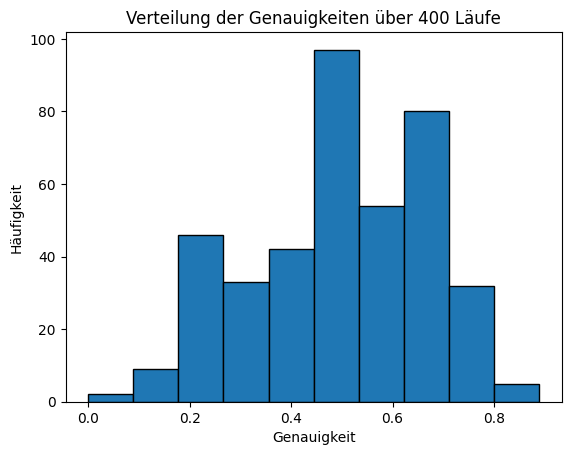

Die zwei wichtigsten Metriken: [('average_clustering', np.float64(0.32941176470588235)), ('betweenness_standard_deviation', np.float64(0.48235294117647054))]



Classifier: KNeighborsClassifier
Testdaten-Anteil: 0.25
Unterschiedliche Aufteilungen der Daten: 400
Genauigkeit: 
    Durchschnitt: 0.5218402777777778
    Minimum: 0.2222222222222222
    Maximum: 0.8888888888888888
    Standardabweichung: 0.1356673205505104
Insgesamt 34 Einträge im Dataframe.


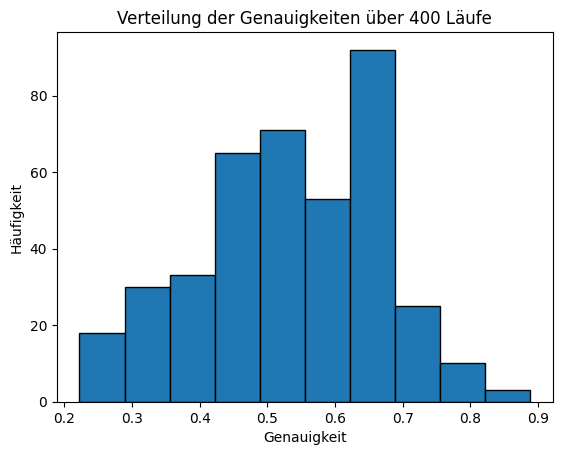

Die zwei wichtigsten Metriken: [('node_count', np.float64(0.19411764705882356)), ('edge_count', np.float64(0.35000000000000003))]



Classifier: GaussianNB
Testdaten-Anteil: 0.25
Unterschiedliche Aufteilungen der Daten: 400
Genauigkeit: 
    Durchschnitt: 0.44322916666666673
    Minimum: 0.0
    Maximum: 0.875
    Standardabweichung: 0.14985193550712478
Insgesamt 34 Einträge im Dataframe.


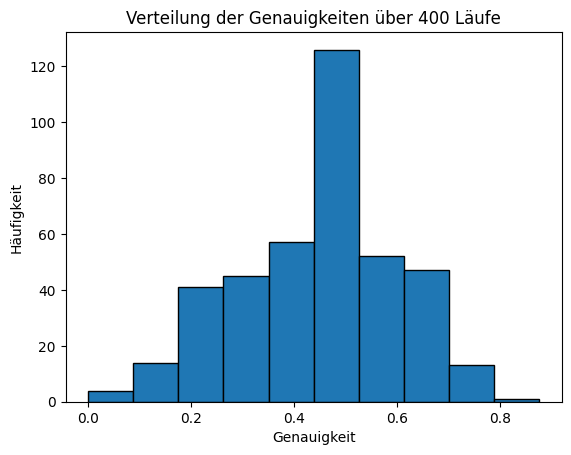

Die zwei wichtigsten Metriken: [('powerlaw_alpha_value', np.float64(0.02058823529411765)), ('edge_count', np.float64(0.0823529411764706))]





In [14]:

# Je Split teilen wir die Daten auf
split_count = 4
n_repeats = 100

# Fold festlegen für Kreuzvalidierung
cv = RepeatedStratifiedKFold(n_splits=split_count, n_repeats=n_repeats, random_state=42)

classifier_list = [
    DummyClassifier(strategy='uniform'),
    DecisionTreeClassifier(), # Entscheidungsbaum
    KNeighborsClassifier(n_neighbors=5), # KNN-Algorithmus
    GaussianNB() # Naive-Bayes-Algorithmus
]

for classifier in classifier_list:

    # Bilden der Genauigkeitswerte
    accuracy_scores = cross_val_score(classifier, X, y, cv=cv)

    # Statistiken dazu ausgeben
    print(str.format("Classifier: {0}", classifier.__class__.__name__))
    print(f'Testdaten-Anteil: {1 / split_count}')
    print(f'Unterschiedliche Aufteilungen der Daten: {len(accuracy_scores)}')
    print(f'Genauigkeit: ')
    print(f'    Durchschnitt: {np.mean(accuracy_scores)}')
    print(f'    Minimum: {min(accuracy_scores)}')
    print(f'    Maximum: {max(accuracy_scores)}')
    print(f'    Standardabweichung: {np.std(accuracy_scores)}')
    print(f'Insgesamt {len(df)} Einträge im Dataframe.')

    # Histogramm zu Genauigkeiten plotten
    plt.hist(accuracy_scores, bins=10, edgecolor='black')
    plt.xlabel('Genauigkeit')
    plt.ylabel('Häufigkeit')
    plt.title(f'Verteilung der Genauigkeiten über {len(accuracy_scores)} Läufe')
    plt.show()

    # Klassifikator auf alle verfügbaren Daten trainieren, damit Permutationswichtigkeit bestimmt werden kann.
    classifier.fit(X, y)

    # Bestimmung der Permutationswichtigkeit
    permutation_importance_list = permutation_importance(classifier, X, y, n_repeats=10)
    most_important_features = sorted(list(zip(features, permutation_importance_list.importances_mean)), key = lambda x: x[1])[-2:]
    print(f"Die zwei wichtigsten Metriken: {most_important_features}")
    print(f"\n\n")
